In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from termcolor import colored

In [2]:
n_estimators = 100
max_depth = 1
bootstrap = 'True'
metrics_list = 'Confusion Matrix'

In [3]:
data = pd.read_csv('mushroom.csv')
print(colored('Overview of Dataset', 'green', attrs=['bold']))
data.head()

Overview of Dataset


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
def load_data():
    label = LabelEncoder()
    for col in data.columns:
        data[col] = label.fit_transform(data[col])
    return data

In [5]:
def split(df):
    y = df.type
    x = df.drop(columns=['type']) 
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)  
    return x_train, x_test, y_train, y_test

In [6]:
def plot_metrics(metrics_list):
        if 'Confusion Matrix' in metrics_list:
            plot_confusion_matrix(model, x_test, y_test, display_labels=class_names)
            plt.title("Confusion Matrix")
            plt.show()
        if 'ROC Curve' in metrics_list:
            plot_roc_curve(model, x_test, y_test)
            plt.title("ROC Curve")
            plt.show()
        if 'Precision-Recall Curve' in metrics_list:
            plot_precision_recall_curve(model, x_test, y_test)
            plt.title("Precision-Recall Curve")
            plt.show()

In [7]:
df = load_data()
x_train, x_test, y_train,y_test = split(df)
class_names = ['edible', 'poisonous']

In [8]:
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,bootstrap=bootstrap,n_jobs=-1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Accuracy of the model

In [9]:
print("Accuracy: ", accuracy_score(y_test,y_pred).round(2))

Accuracy:  0.92


### Precision Score of the model

In [10]:
print("Precison: ", precision_score(y_test, y_pred, labels=class_names).round(2))

Precison:  0.95


### Recall score of the model

In [11]:
print("Recall: ",recall_score(y_test, y_pred, labels=class_names).round(2))

Recall:  0.87


### Plot Metrics

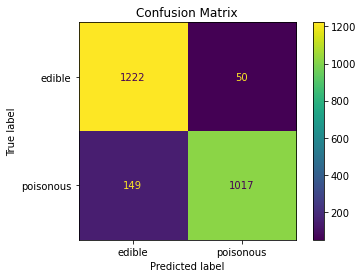

In [12]:
plot_metrics(metrics_list)